In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Den Pfad zur CSV-Datei definieren (angenommen, sie liegt im 'data'-Ordner deines Projekts)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'Dataset.csv')

# CSV-Datei einlesen
df = pd.read_csv(csv_file_path)

# Die ersten Zeilen des Datensatzes anzeigen
print(df.head())

# Spaltenüberschriften prüfen 
print(df.columns)

                                      Document Title  \
0  The role of inspection in software quality ass...   
1   Modular verification of software components in C   
2  Response To: Comments On "property-based Softw...   
3  Toward a mathematical foundation of software e...   
4  Evaluation of several nonparametric bootstrap ...   

                                             Authors  \
0                           D. L. Parnas; M. Lawford   
1  S. Chaki; E. M. Clarke; A. Groce; S. Jha; H. V...   
2             L. C. Briand; S. Morasca; V. R. Basili   
3                                            M. Broy   
4                            Skylar Lei; M. R. Smith   

                                 Author Affiliations  \
0  Software Quality Research Laboratory, Universi...   
1  School of Computer Science, Carnegie Mellon Un...   
2  Fraunhofer Institute of Experimental Software ...   
3  Institut f ür Informatik, Technische Universit...   
4  Dynamics Canada, Calgary, AB, Canada; Depar

In [2]:
# Liste von KI-relevanten Keywords erstellen
ai_keywords = [
    'AI', 'Artificial Intelligence', 'Machine Learning', 'Deep Learning', 
    'Neural Networks', 'Convolutional Neural Networks (CNN)',
    'Recurrent Neural Networks (RNN)', 'Transformer', 
    'Natural Language Processing', 'Computer Vision',
    'AI-driven Development', 'Automated Testing', 'Code Generation',
    'AI Augmentation', 'Reinforcement Learning', 'Expert Systems',
    'Knowledge-Based Systems', 'Automated Reasoning', 'Intelligent Agents',
    'Genetic Algorithms', 'Evolutionary Computing', 'Automated Bug Detection',
    'Defect Prediction', 'Automated Code Review', 'Smart Code Completion',
    'Automated Requirements Engineering', 'Intelligent Maintenance',
    'AI-based Testing', 'Test Case Generation', 'Self-Adaptive Systems',
    'Large Language Models', 'ChatGPT', 'GPT', 'GitHub Copilot',
    'AutoML', 'Transfer Learning'
]

# Funktion zum Prüfen, ob Text AI-Keywords enthält
def contains_ai_terms(text):
    if isinstance(text, str):
        return any(keyword.lower() in text.lower() for keyword in ai_keywords)
    return False

# CSV-Datei einlesen (Pfad anpassen)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'Dataset.csv')
df = pd.read_csv(csv_file_path)

# Filtern der AI-relevanten Papers
df['is_ai_related'] = df['Document Title'].apply(contains_ai_terms)
ai_papers = df[df['is_ai_related']]

# Duplikate basierend auf dem Titel entfernen
ai_papers = ai_papers.drop_duplicates(subset=['Document Title'], keep='first')
print(f"Anzahl der verbleibenden Papers nach Entfernen von Duplikaten: {len(ai_papers)}")

# Papers mit fehlenden Abstracts entfernen
if 'Abstract' in ai_papers.columns:
    ai_papers = ai_papers.dropna(subset=['Abstract'])
    print(f"Anzahl der verbleibenden Papers nach Entfernen irrelevanter Publikationen: {len(ai_papers)}")
else:
    print("Spalte 'Abstract' nicht gefunden, keine weiteren Einträge entfernt.")

# Speichern der bereinigten und gefilterten Daten in einer separaten CSV-Datei
output_file_path = os.path.join(os.getcwd(), 'AI_Related_Papers_Cleaned.csv')
ai_papers.to_csv(output_file_path, index=False)

print(f"Die bereinigten AI-relevanten Papers wurden in der Datei '{output_file_path}' gespeichert.")


Anzahl der verbleibenden Papers nach Entfernen von Duplikaten: 652
Anzahl der verbleibenden Papers nach Entfernen irrelevanter Publikationen: 642
Die bereinigten AI-relevanten Papers wurden in der Datei '/Users/mago/Eigene Dateien/Hochschule Flensburg/HS-Master/1. Semester/Data Driven Business NEU/v2/Data-Driven-Businesses/(Mago)_KI_im_Software_E/AI_Related_Papers_Cleaned.csv' gespeichert.



Extrahierte Jahre:
Year
2002     55
2003      8
2004      6
2005      9
2006      6
2007      7
2008     12
2009      7
2010      8
2011     12
2012     41
2013      7
2014      4
2015     14
2016     14
2017     16
2018     23
2019     26
2020     23
2021     25
2022     95
2023     91
2024    133
Name: count, dtype: int64


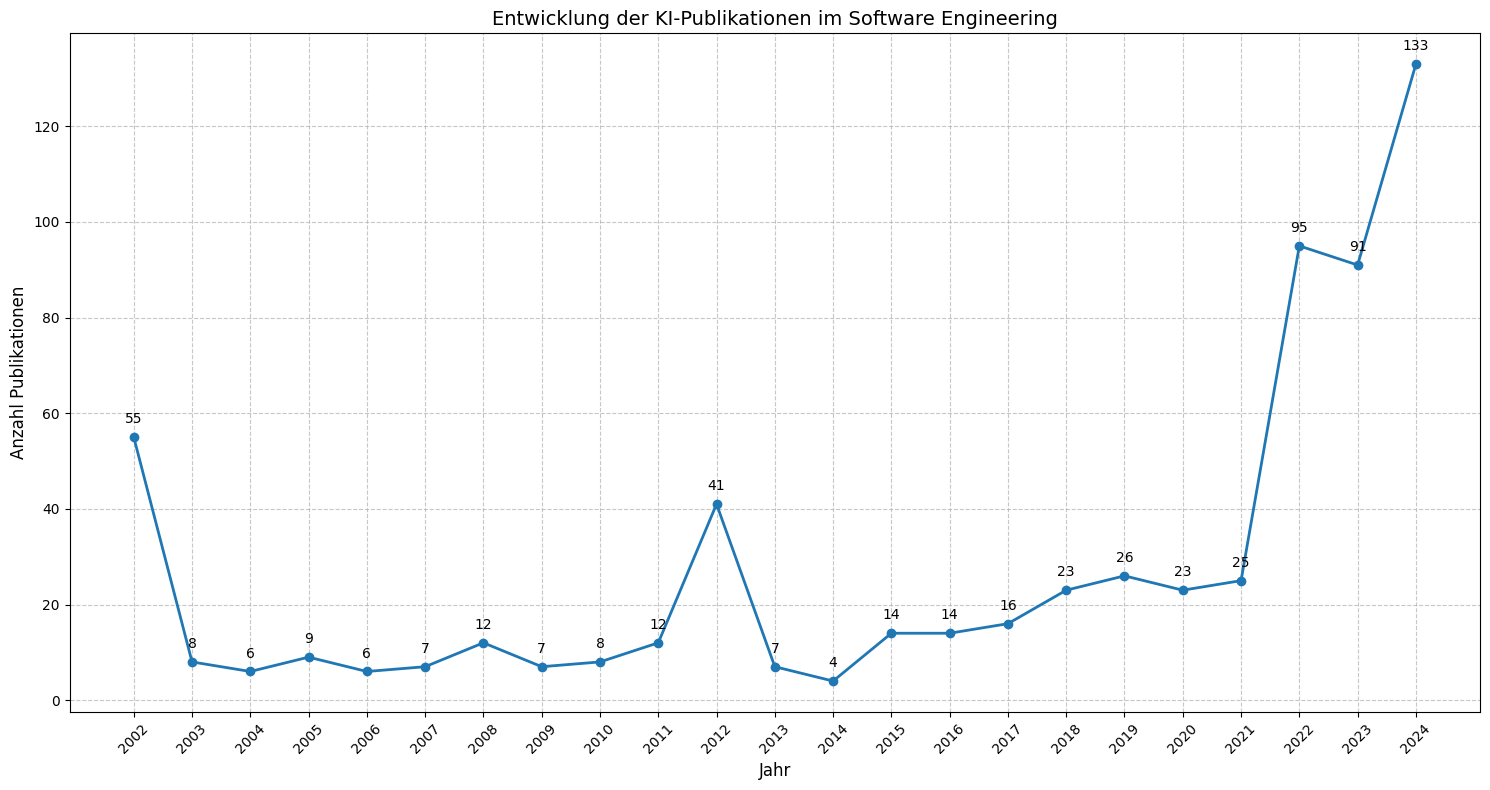

In [3]:
# Pfad zur gespeicherten, bereinigten CSV-Datei mit KI-relevanten Papers
input_file_path = os.path.join(os.getcwd(), 'AI_Related_Papers_Cleaned.csv')

# CSV-Datei einlesen
ai_papers = pd.read_csv(input_file_path)

# Jahr aus der Spalte 'Online Date' extrahieren
ai_papers['Year'] = pd.to_datetime(ai_papers['Online Date'], errors='coerce').dt.year

# Entfernen von Einträgen mit ungültigen oder fehlenden Jahresangaben
ai_papers = ai_papers.dropna(subset=['Year'])

# Überprüfen der extrahierten Jahre
print("\nExtrahierte Jahre:")
print(ai_papers['Year'].value_counts().sort_index())

# Visualisierung
plt.figure(figsize=(15, 8))
yearly_counts = ai_papers['Year'].value_counts().sort_index()

# Plot mit jährlichen Schritten
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2)

plt.title('Entwicklung der KI-Publikationen im Software Engineering', fontsize=14)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Anzahl Publikationen', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# X-Achse mit allen Jahren
plt.xticks(yearly_counts.index, rotation=45)

# Datenpunkte beschriften
for x, y in zip(yearly_counts.index, yearly_counts.values):
    plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()


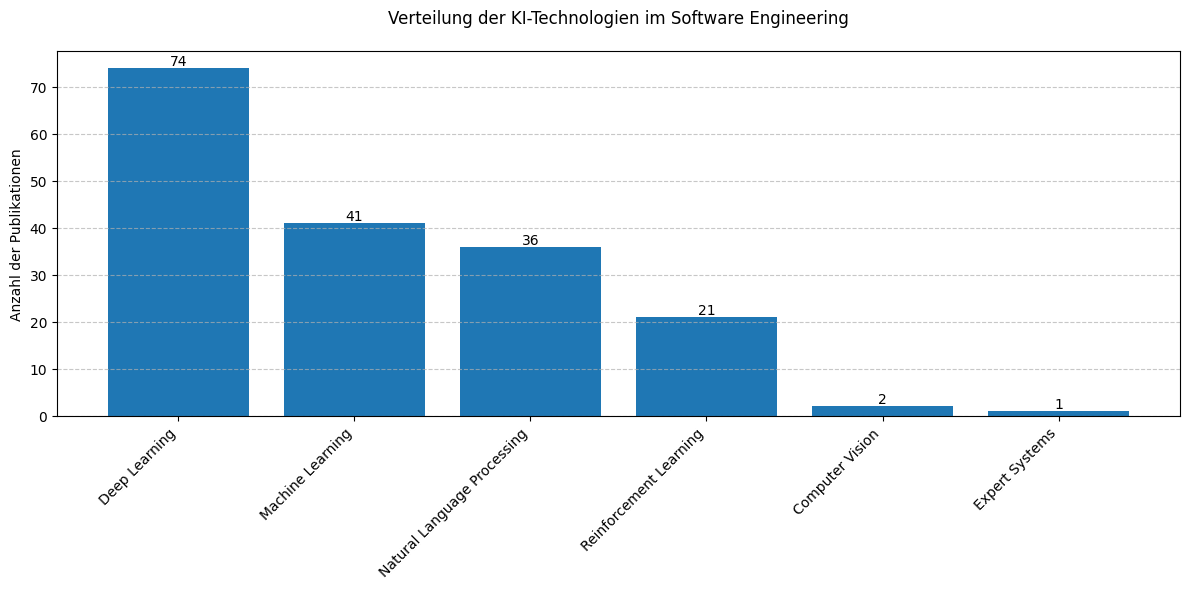


Prozentuale Verteilung der Technologien:
Deep Learning: 42.3%
Machine Learning: 23.4%
Natural Language Processing: 20.6%
Reinforcement Learning: 12.0%
Computer Vision: 1.1%
Expert Systems: 0.6%


In [6]:
# Analyse der dominanten KI-Technologien
# Definition der Technologie-Kategorien und zugehörige Keywords
tech_categories = {
    'Machine Learning': ['machine learning', 'ml', 'supervised learning', 'unsupervised learning'],
    'Deep Learning': ['deep learning', 'neural network', 'cnn', 'rnn', 'lstm'],
    'Natural Language Processing': ['nlp', 'natural language processing', 'text analysis', 'language model'],
    'Computer Vision': ['computer vision', 'image processing', 'object detection'],
    'Reinforcement Learning': ['reinforcement learning', 'rl', 'q-learning'],
    'Expert Systems': ['expert system', 'knowledge base', 'rule-based']
}

# Zählen der Technologien
tech_counts = {}
for category, keywords in tech_categories.items():
    tech_counts[category] = sum(ai_papers['Document Title'].apply(
        lambda x: any(keyword.lower() in str(x).lower() for keyword in keywords)
    ))

# Sortieren der Ergebnisse nach Häufigkeit
tech_counts = dict(sorted(tech_counts.items(), key=lambda x: x[1], reverse=True))

# Visualisierung der Technologieverteilung
plt.figure(figsize=(12, 6))
bars = plt.bar(tech_counts.keys(), tech_counts.values())
plt.xticks(rotation=45, ha='right')
plt.title('Verteilung der KI-Technologien im Software Engineering', pad=20)
plt.ylabel('Anzahl der Publikationen')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Werte über den Balken anzeigen
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Prozentuale Verteilung ausgeben
total = sum(tech_counts.values())
print("\nProzentuale Verteilung der Technologien:")
for tech, count in tech_counts.items():
    percentage = (count/total) * 100
    print(f"{tech}: {percentage:.1f}%")

In [7]:
#Analyse des wissenschaftlichen Impacts:
# Top 10 meist-zitierte Papers
top_cited = ai_papers.nlargest(10, 'Article Citation Count')
print("\nTop 10 meist-zitierte Papers:")
for _, paper in top_cited.iterrows():
    print(f"\nTitel: {paper['Document Title']}")
    print(f"Zitationen: {paper['Article Citation Count']}")
    print(f"Jahr: {paper['Year']}")


Top 10 meist-zitierte Papers:

Titel: Benchmarking Classification Models for Software Defect Prediction: A Proposed Framework and Novel Findings
Zitationen: 849.0
Jahr: 2008

Titel: GenProg: A Generic Method for Automatic Software Repair
Zitationen: 718.0
Jahr: 2011

Titel: A critique of software defect prediction models
Zitationen: 694.0
Jahr: 2002

Titel: Simplifying and isolating failure-inducing input
Zitationen: 670.0
Jahr: 2002

Titel: Model-checking algorithms for continuous-time Markov chains
Zitationen: 526.0
Jahr: 2003

Titel: Change Distilling:Tree Differencing for Fine-Grained Source Code Change Extraction
Zitationen: 452.0
Jahr: 2007

Titel: Quantitative analysis of faults and failures in a complex software system
Zitationen: 442.0
Jahr: 2002

Titel: An Exploratory Study of How Developers Seek, Relate, and Collect Relevant Information during Software Maintenance Tasks
Zitationen: 418.0
Jahr: 2006

Titel: Machine Learning Testing: Survey, Landscapes and Horizons
Zitationen

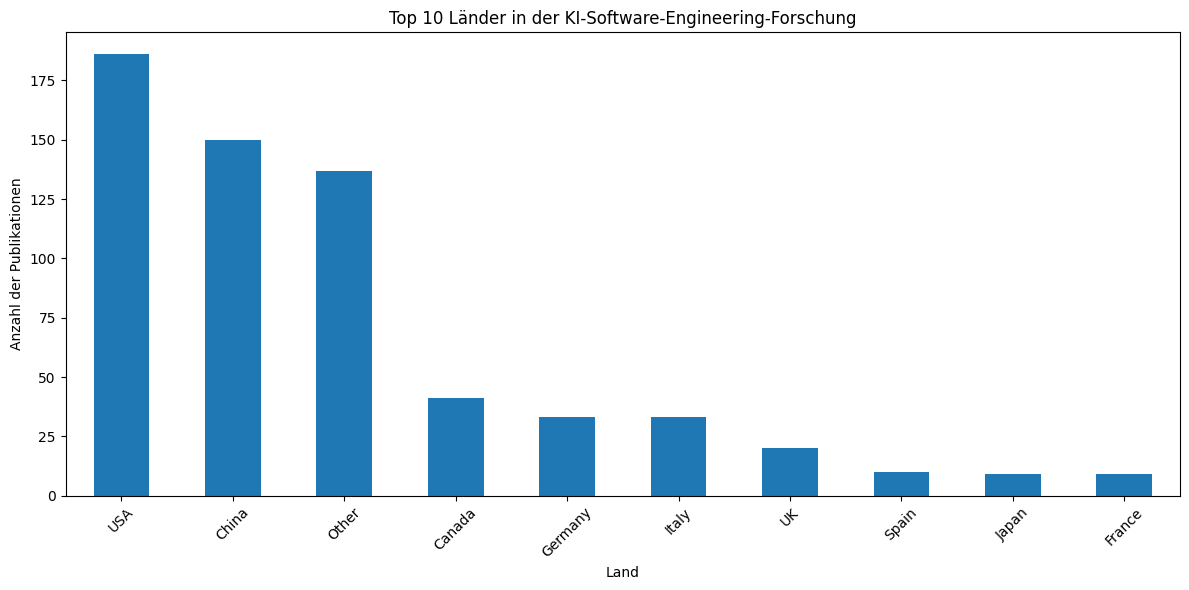

In [8]:
#Geografische Analyse:
# Funktion zur Extraktion des Landes aus der Affiliation
def extract_country(affiliation):
    if pd.isna(affiliation):
        return 'Unknown'
    
    # Häufige Länder
    countries = ['USA', 'United States', 'Germany', 'China', 'UK', 'Japan', 
                'Canada', 'France', 'Italy', 'Spain', 'Netherlands']
    
    for country in countries:
        if country.lower() in affiliation.lower():
            return country
    return 'Other'

# Land extrahieren
ai_papers['Country'] = ai_papers['Author Affiliations'].apply(extract_country)

# Top 10 Länder visualisieren
plt.figure(figsize=(12, 6))
country_counts = ai_papers['Country'].value_counts().head(10)
country_counts.plot(kind='bar')
plt.title('Top 10 Länder in der KI-Software-Engineering-Forschung')
plt.xlabel('Land')
plt.ylabel('Anzahl der Publikationen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

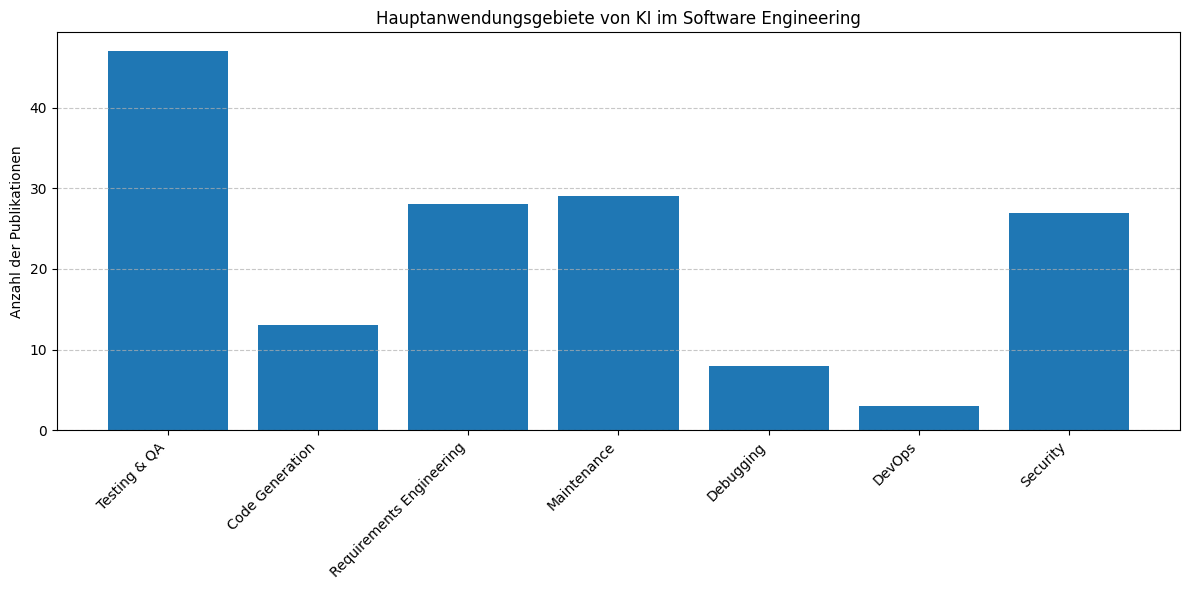

In [9]:
# Analyse der Hauptanwendungsgebiete:
# Anwendungsbereiche definieren
application_areas = {
    'Testing & QA': ['testing', 'quality assurance', 'test generation'],
    'Code Generation': ['code generation', 'code synthesis', 'code completion'],
    'Requirements Engineering': ['requirements', 'specification', 'requirement analysis'],
    'Maintenance': ['maintenance', 'evolution', 'legacy'],
    'Debugging': ['debug', 'fault detection', 'bug detection'],
    'DevOps': ['continuous integration', 'deployment', 'devops'],
    'Security': ['security', 'vulnerability', 'threat']
}

# Zählen der Anwendungsbereiche
area_counts = {}
for area, keywords in application_areas.items():
    area_counts[area] = sum(ai_papers['Document Title'].apply(
        lambda x: any(keyword.lower() in str(x).lower() for keyword in keywords)
    ))

# Visualisierung
plt.figure(figsize=(12, 6))
plt.bar(area_counts.keys(), area_counts.values())
plt.xticks(rotation=45, ha='right')
plt.title('Hauptanwendungsgebiete von KI im Software Engineering')
plt.ylabel('Anzahl der Publikationen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/Users/mago/.pyenv/versions/3.12.0/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.



Top Themen und ihre häufigsten Wörter:
    Topic  Count                                            Name  \
0      -1    211                                -1_the_and_to_of   
1       0     84                             0_the_of_models_and   
2       1     77                              1_the_repair_of_to   
3       2     53                      2_defect_prediction_the_of   
4       3     38                   3_maintenance_software_the_of   
5       4     18                         4_taint_to_analysis_the   
6       5     18                5_domain_modeling_metamodels_and   
7       6     17                            6_fairness_the_in_of   
8       7     16                 7_specification_the_timing_time   
9       8     16                                 8_ai_and_the_of   
10      9     15                   9_safety_the_to_reinforcement   
11     10     13                  10_reliability_the_of_software   
12     11     11         11_developers_personality_paid_software   
13     1

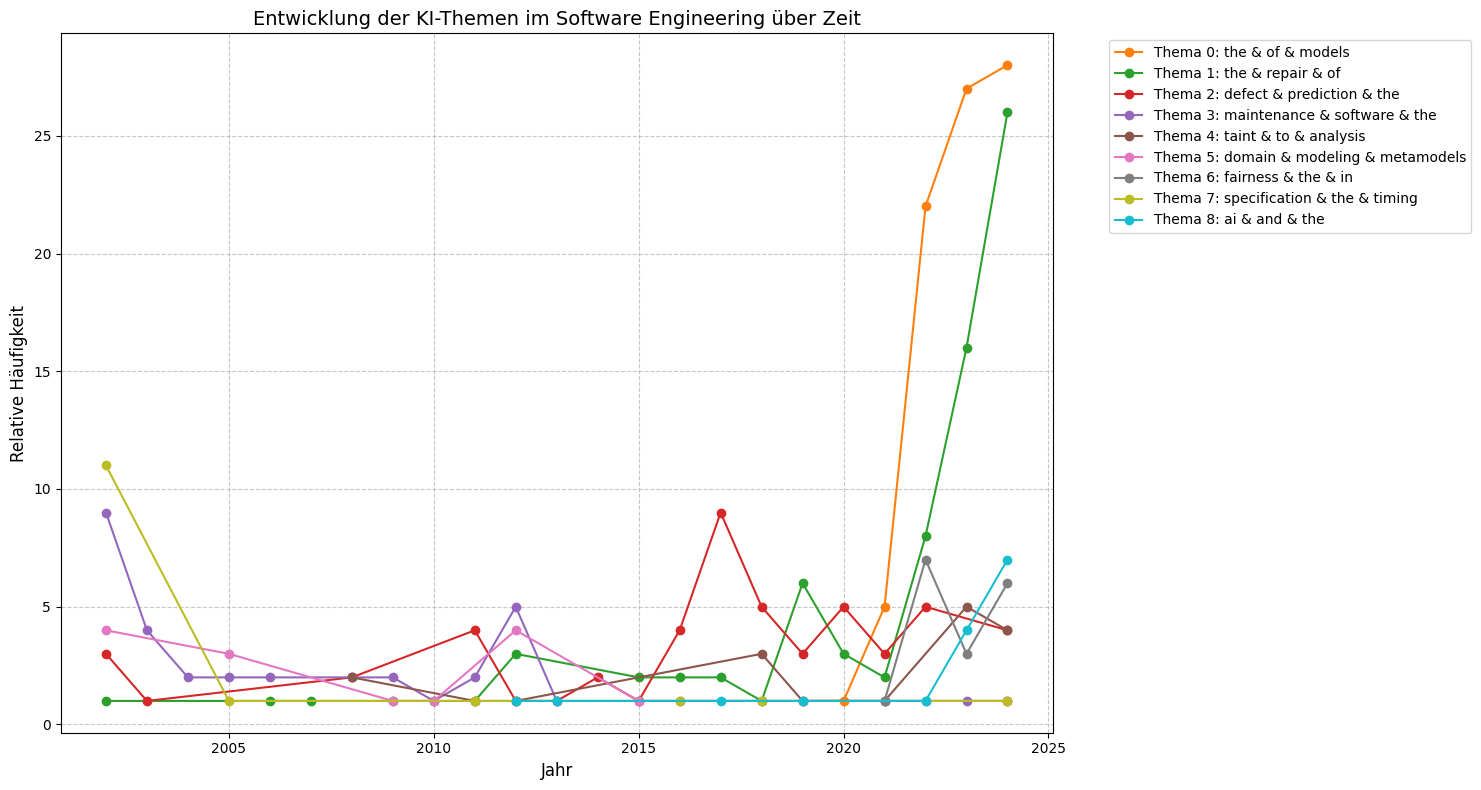


Detaillierte Analyse der Top-Themen:

Thema 0: the & of & models
Anzahl Dokumente: 84
Top 5 Wörter: the, of, models, and, to

Thema 1: the & repair & of
Anzahl Dokumente: 77
Top 5 Wörter: the, repair, of, to, code

Thema 2: defect & prediction & the
Anzahl Dokumente: 53
Top 5 Wörter: defect, prediction, the, of, and

Thema 3: maintenance & software & the
Anzahl Dokumente: 38
Top 5 Wörter: maintenance, software, the, of, and

Thema 4: taint & to & analysis
Anzahl Dokumente: 18
Top 5 Wörter: taint, to, analysis, the, and

Thema 5: domain & modeling & metamodels
Anzahl Dokumente: 18
Top 5 Wörter: domain, modeling, metamodels, and, of

Thema 6: fairness & the & in
Anzahl Dokumente: 17
Top 5 Wörter: fairness, the, in, of, protected

Thema 7: specification & the & timing
Anzahl Dokumente: 16
Top 5 Wörter: specification, the, timing, time, of

Thema 8: ai & and & the
Anzahl Dokumente: 16
Top 5 Wörter: ai, and, the, of, as


In [10]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt

# Vorbereitung der Dokumente
documents = []
timestamps = []
for _, row in ai_papers.iterrows():
    text = str(row['Document Title'])
    if 'Abstract' in row and not pd.isna(row['Abstract']):
        text += " " + str(row['Abstract'])
    documents.append(text)
    timestamps.append(row['Year'])

# Initialize BERT model for embeddings
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

# BERTopic Modell erstellen und trainieren
topic_model = BERTopic(
    embedding_model=sentence_model,
    min_topic_size=5,
    nr_topics='auto'
)

# Modell trainieren
topics, probs = topic_model.fit_transform(documents)

# Themen Namen basierend auf den häufigsten Wörtern erstellen
def create_topic_name(topic_words):
    # Die ersten 3 Wörter nehmen und als Namen zusammenfügen
    words = [word for word, _ in topic_words[:3]]
    return " & ".join(words)

# Topic Namen Dictionary erstellen
topic_names = {}
for topic_id in topic_model.get_topics():
    if topic_id != -1:
        topic_words = topic_model.get_topic(topic_id)
        topic_names[topic_id] = create_topic_name(topic_words)

# Grundlegende Themeninformationen anzeigen
topic_info = topic_model.get_topic_info()
print("\nTop Themen und ihre häufigsten Wörter:")
print(topic_info)

# Topics over time berechnen
topics_over_time = topic_model.topics_over_time(documents, timestamps)

# Visualisierung mit aussagekräftiger Legende
plt.figure(figsize=(15, 8))
top_topics = topic_info.head(10)  # Top 10 Themen

# Farben für die verschiedenen Themen
colors = plt.cm.tab10(np.linspace(0, 1, len(top_topics)))

for (_, topic_row), color in zip(top_topics.iterrows(), colors):
    topic_id = topic_row['Topic']
    if topic_id != -1:
        topic_data = topics_over_time[topics_over_time['Topic'] == topic_id]
        label = f"Thema {topic_id}: {topic_names[topic_id]}"
        plt.plot(topic_data['Timestamp'], topic_data['Frequency'], 
                label=label, marker='o', color=color)

plt.title('Entwicklung der KI-Themen im Software Engineering über Zeit', fontsize=14)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Relative Häufigkeit', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Detaillierte Analyse ausgeben
print("\nDetaillierte Analyse der Top-Themen:")
for _, row in top_topics.iterrows():
    topic_id = row['Topic']
    if topic_id != -1:
        print(f"\nThema {topic_id}: {topic_names[topic_id]}")
        print(f"Anzahl Dokumente: {row['Count']}")
        words = [word for word, _ in topic_model.get_topic(topic_id)[:5]]
        print("Top 5 Wörter:", ", ".join(words))

Top 10 meist-zitierte Papers:

Titel: Benchmarking Classification Models for Software Defect Prediction: A Proposed Framework and Novel Findings
Zitationen: 849.0
Jahr: 2008
Journal: IEEE Transactions on Software Engineering
----------------------------------------------------------------------------------------------------

Titel: GenProg: A Generic Method for Automatic Software Repair
Zitationen: 718.0
Jahr: 2011
Journal: IEEE Transactions on Software Engineering
----------------------------------------------------------------------------------------------------

Titel: A critique of software defect prediction models
Zitationen: 694.0
Jahr: 2002
Journal: IEEE Transactions on Software Engineering
----------------------------------------------------------------------------------------------------

Titel: Simplifying and isolating failure-inducing input
Zitationen: 670.0
Jahr: 2002
Journal: IEEE Transactions on Software Engineering
-------------------------------------------------------

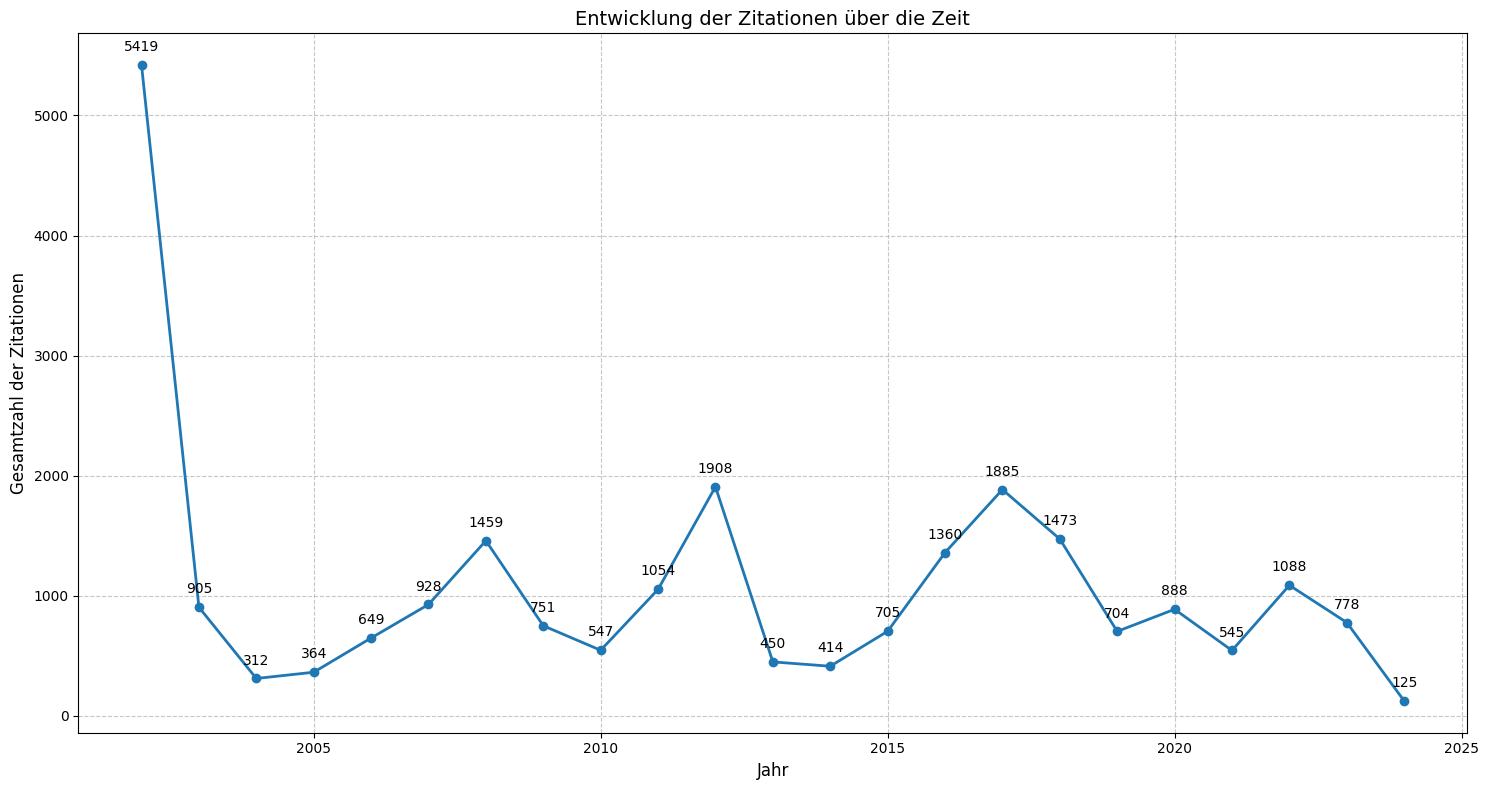


Top 10 Journals nach Gesamtzitationen:
                                             Journal  Anzahl Papers  \
4          IEEE Transactions on Software Engineering            409   
0  2012 34th International Conference on Software...             31   
1  2022 IEEE/ACM 44th International Conference on...             62   
2  2023 IEEE/ACM 45th International Conference on...             61   
3  2024 IEEE/ACM 46th International Conference on...             79   

   Gesamtzitationen  Durchschnittliche Zitationen  
4           22257.0                     54.418093  
0            1042.0                     33.612903  
1             725.0                     11.693548  
2             620.0                     10.163934  
3              67.0                      0.848101  


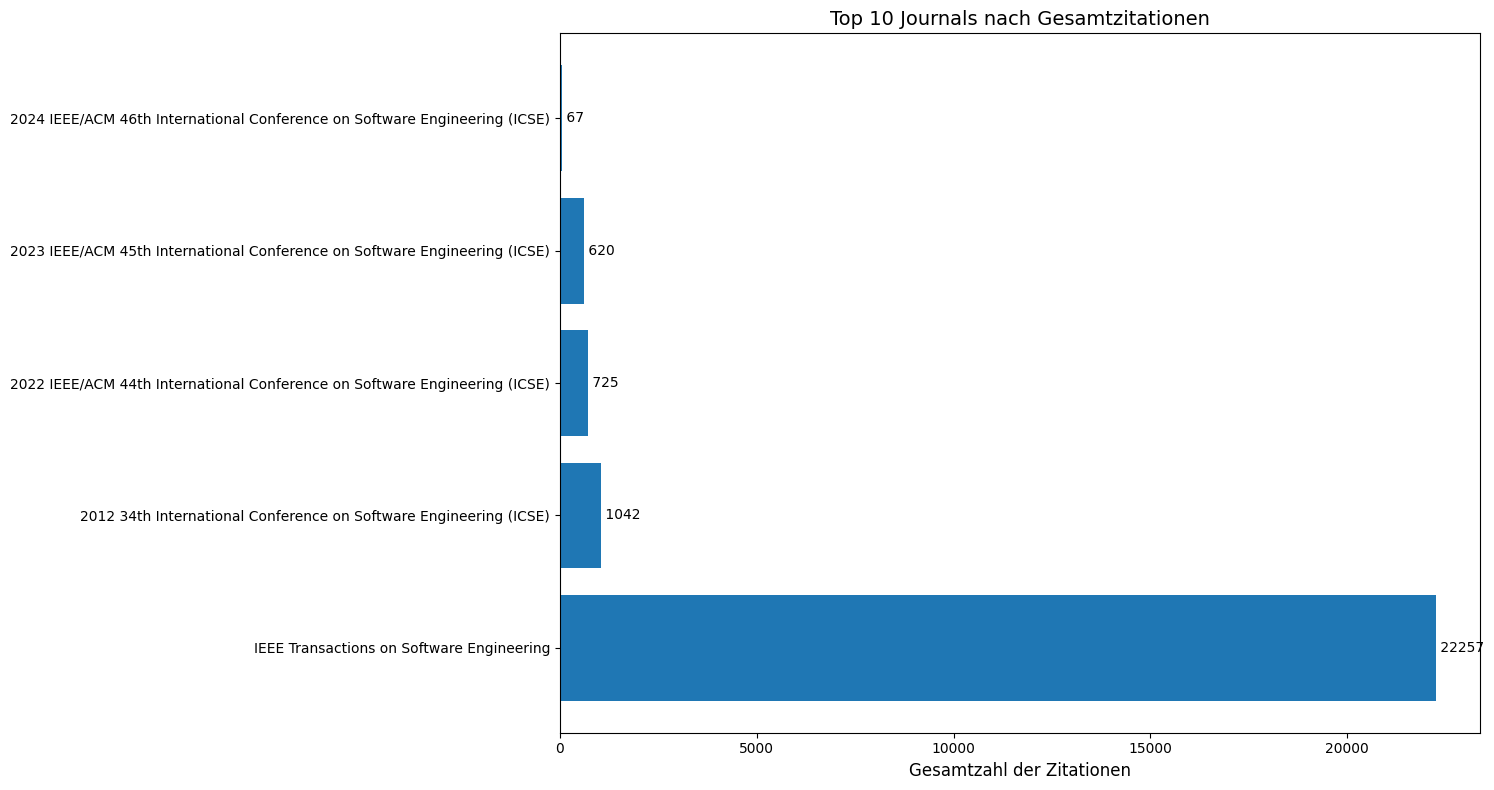

In [11]:
# Analyse des wissenschaftlichen Impacts und die Untersuchung der Zitationen und führenden Journals
# 1. Analyse der Top-zitierten Papers
print("Top 10 meist-zitierte Papers:")
top_cited = ai_papers.nlargest(10, 'Article Citation Count')
for idx, paper in top_cited.iterrows():
    print(f"\nTitel: {paper['Document Title']}")
    print(f"Zitationen: {paper['Article Citation Count']}")
    print(f"Jahr: {paper['Year']}")
    print(f"Journal: {paper['Publication Title']}")
    print("-" * 100)

# 2. Visualisierung der Zitationsentwicklung über die Zeit
plt.figure(figsize=(15, 8))
yearly_citations = ai_papers.groupby('Year')['Article Citation Count'].sum()

plt.plot(yearly_citations.index, yearly_citations.values, marker='o', linewidth=2)
plt.title('Entwicklung der Zitationen über die Zeit', fontsize=14)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Gesamtzahl der Zitationen', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Datenpunkte beschriften
for x, y in zip(yearly_citations.index, yearly_citations.values):
    plt.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# 3. Analyse der führenden Journals
journal_stats = ai_papers.groupby('Publication Title').agg({
    'Document Title': 'count',  # Anzahl der Papers
    'Article Citation Count': 'sum'  # Gesamtzahl der Zitationen
}).reset_index()

journal_stats.columns = ['Journal', 'Anzahl Papers', 'Gesamtzitationen']
journal_stats['Durchschnittliche Zitationen'] = journal_stats['Gesamtzitationen'] / journal_stats['Anzahl Papers']
journal_stats = journal_stats.sort_values('Gesamtzitationen', ascending=False)

print("\nTop 10 Journals nach Gesamtzitationen:")
print(journal_stats.head(10))

# 4. Visualisierung der Top-Journals
plt.figure(figsize=(15, 8))
top_journals = journal_stats.head(10)

plt.barh(top_journals['Journal'], top_journals['Gesamtzitationen'])
plt.title('Top 10 Journals nach Gesamtzitationen', fontsize=14)
plt.xlabel('Gesamtzahl der Zitationen', fontsize=12)

# Werte an den Balken anzeigen
for i, v in enumerate(top_journals['Gesamtzitationen']):
    plt.text(v, i, f' {int(v)}', va='center')

plt.tight_layout()
plt.show()

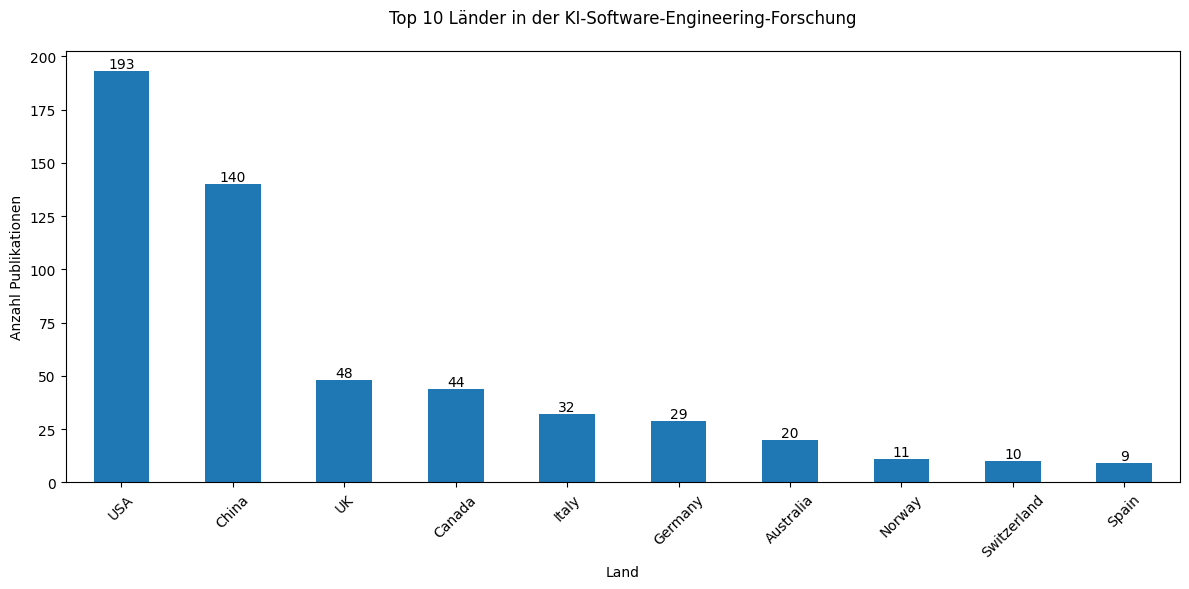

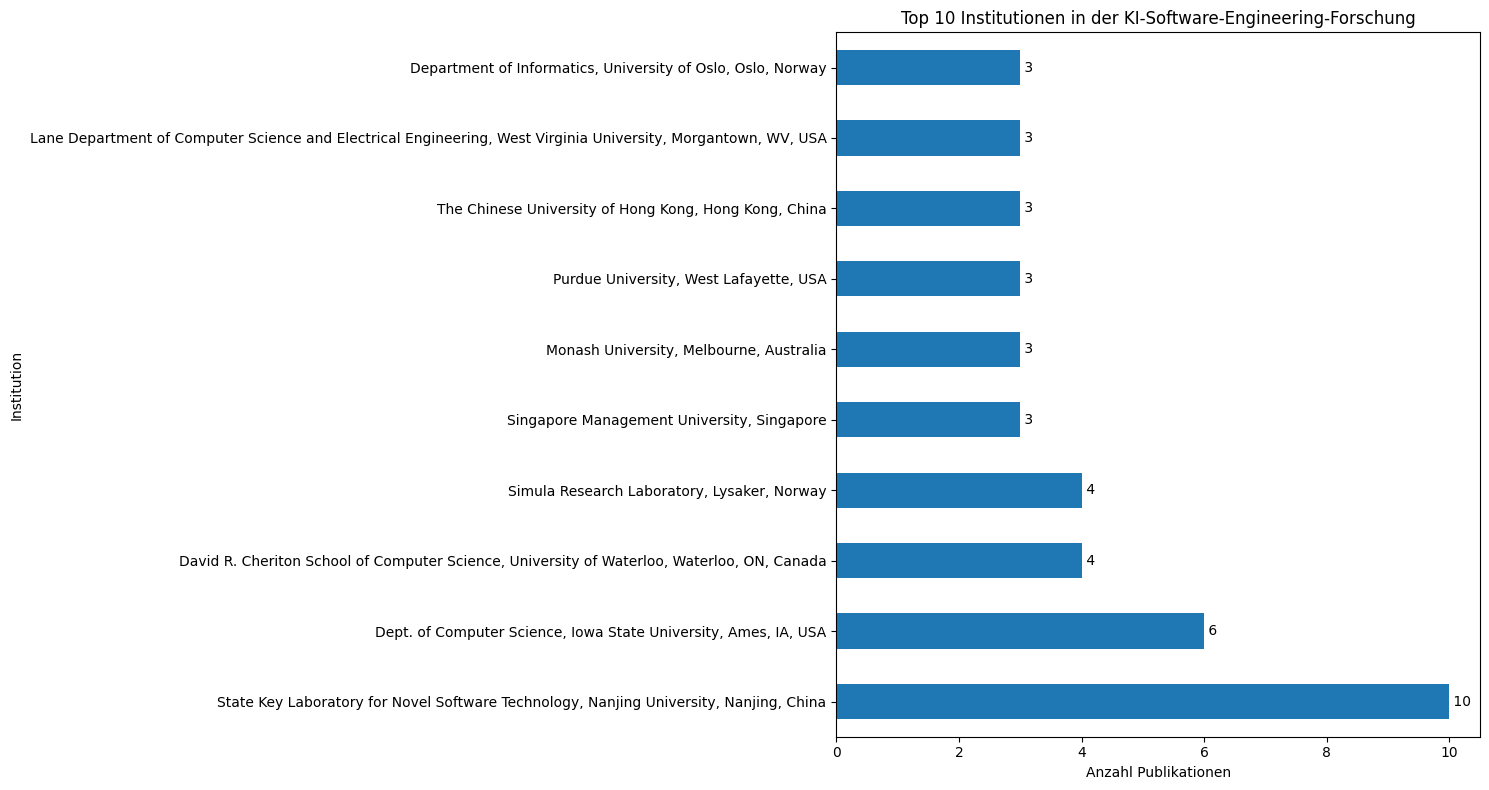


Top 10 Länder und ihre Publikationszahlen:
USA: 193
China: 140
UK: 48
Canada: 44
Italy: 32
Germany: 29
Australia: 20
Norway: 11
Switzerland: 10
Spain: 9

Top 10 Institutionen und ihre Publikationszahlen:
State Key Laboratory for Novel Software Technology, Nanjing University, Nanjing, China: 10
Dept. of Computer Science, Iowa State University, Ames, IA, USA: 6
David R. Cheriton School of Computer Science, University of Waterloo, Waterloo, ON, Canada: 4
Simula Research Laboratory, Lysaker, Norway: 4
Singapore Management University, Singapore: 3
Monash University, Melbourne, Australia: 3
Purdue University, West Lafayette, USA: 3
The Chinese University of Hong Kong, Hong Kong, China: 3
Lane Department of Computer Science and Electrical Engineering, West Virginia University, Morgantown, WV, USA: 3
Department of Informatics, University of Oslo, Oslo, Norway: 3


In [12]:
# CSV-Datei einlesen
ai_papers = pd.read_csv('AI_Related_Papers_Cleaned.csv')

def extract_country(affiliation):
   # Spezifische Länder und ihre Varianten
   common_countries = {
       'USA': ['USA', 'United States', 'U.S.A', 'United States of America', 'United States of'],
       'UK': ['UK', 'United Kingdom', 'England', 'Scotland', 'Wales', 'Britain'],
       'Germany': ['Germany', 'Deutschland'],
       'China': ['China', 'P.R. China', 'People\'s Republic of China'],
       'Canada': ['Canada'],
       'Japan': ['Japan'],
       'India': ['India'],
       'Australia': ['Australia'],
       'France': ['France'],
       'Italy': ['Italy'],
       'Spain': ['Spain'],
       'Netherlands': ['Netherlands', 'The Netherlands'],
       'Switzerland': ['Switzerland'],
       'South Korea': ['South Korea', 'Korea'],
       'Singapore': ['Singapore'],
       'Brazil': ['Brazil'],
       'Sweden': ['Sweden'],
       'Norway': ['Norway'],
       'Denmark': ['Denmark'],
       'Austria': ['Austria']
   }
   
   if pd.isna(affiliation):
       return None
       
   affiliation = str(affiliation).lower()
   for country, variants in common_countries.items():
       if any(variant.lower() in affiliation for variant in variants):
           return country
   return None

# Länder extrahieren
ai_papers['Country'] = ai_papers['Author Affiliations'].apply(extract_country)

# Nur valide Länder behalten und Top 10 auswählen
valid_countries = ai_papers['Country'].dropna().value_counts().head(10)

# Visualisierung der Länder
plt.figure(figsize=(12, 6))
bars = valid_countries.plot(kind='bar')
plt.title('Top 10 Länder in der KI-Software-Engineering-Forschung', pad=20)
plt.xlabel('Land')
plt.ylabel('Anzahl Publikationen')
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for i, v in enumerate(valid_countries):
   plt.text(i, v, str(int(v)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Institutionsanalyse
def extract_institution(affiliation):
   if pd.isna(affiliation):
       return None
   
   # Erste Institution nehmen (falls mehrere angegeben sind)
   institution = affiliation.split(';')[0].strip()
   
   # Kurze oder leere Institutionsnamen ausfiltern
   if len(institution) < 5:
       return None
       
   return institution

ai_papers['Institution'] = ai_papers['Author Affiliations'].apply(extract_institution)

# Top 10 Institutionen (ohne None-Werte)
valid_institutions = ai_papers['Institution'].dropna().value_counts().head(10)

# Visualisierung der Top 10 Institutionen
plt.figure(figsize=(15, 8))
valid_institutions.plot(kind='barh')
plt.title('Top 10 Institutionen in der KI-Software-Engineering-Forschung')
plt.xlabel('Anzahl Publikationen')

# Werte neben den Balken anzeigen
for i, v in enumerate(valid_institutions):
   plt.text(v, i, f' {int(v)}', va='center')

plt.tight_layout()
plt.show()

# Statistiken ausgeben
print("\nTop 10 Länder und ihre Publikationszahlen:")
for country, count in valid_countries.items():
   print(f"{country}: {int(count)}")

print("\nTop 10 Institutionen und ihre Publikationszahlen:")
for institution, count in valid_institutions.items():
   print(f"{institution}: {int(count)}")